In [25]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [26]:
data_type = 'test'

In [27]:
# With KD
with open(f'../scripts/cosine_similarity/student_kd2/teacher_microbert_cos_sim_{data_type}.pkl', 'rb') as f:
    microbert_kd = pickle.load(f)

with open(f'../scripts/cosine_similarity/student_kd2/teacher_minibert_cos_sim_{data_type}.pkl', 'rb') as f:
    minibert_kd =  pickle.load(f)
    
with open(f'../scripts/cosine_similarity/student_kd2/teacher_nanobert_cos_sim_{data_type}.pkl', 'rb') as f:
    nanobert_kd =  pickle.load(f)

with open(f'../scripts/cosine_similarity/student_kd2/teacher_picobert_cos_sim_{data_type}.pkl', 'rb') as f:
    picobert_kd =  pickle.load(f)

In [28]:
# With KD + MSE
with open(f'../scripts/cosine_similarity/student_kd/teacher_microbert_cos_sim_{data_type}.pkl', 'rb') as f:
    microbert_kd_mse = pickle.load(f)

with open(f'../scripts/cosine_similarity/student_kd/teacher_minibert_cos_sim_{data_type}.pkl', 'rb') as f:
    minibert_kd_mse =  pickle.load(f)
    
with open(f'../scripts/cosine_similarity/student_kd/teacher_nanobert_cos_sim_{data_type}.pkl', 'rb') as f:
    nanobert_kd_mse =  pickle.load(f)

with open(f'../scripts/cosine_similarity/student_kd/teacher_picobert_cos_sim_{data_type}.pkl', 'rb') as f:
    picobert_kd_mse =  pickle.load(f)

In [29]:
# Without KD
with open(f'../scripts/cosine_similarity/student/teacher_microbert_cos_sim_{data_type}.pkl', 'rb') as f:
    microbert = pickle.load(f)

with open(f'../scripts/cosine_similarity/student/teacher_minibert_cos_sim_{data_type}.pkl', 'rb') as f:
    minibert =  pickle.load(f)
    
with open(f'../scripts/cosine_similarity/student/teacher_nanobert_cos_sim_{data_type}.pkl', 'rb') as f:
    nanobert =  pickle.load(f)

with open(f'../scripts/cosine_similarity/student/teacher_picobert_cos_sim_{data_type}.pkl', 'rb') as f:
    picobert =  pickle.load(f)

In [30]:
def smooth(scalars,  weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return np.array(smoothed)

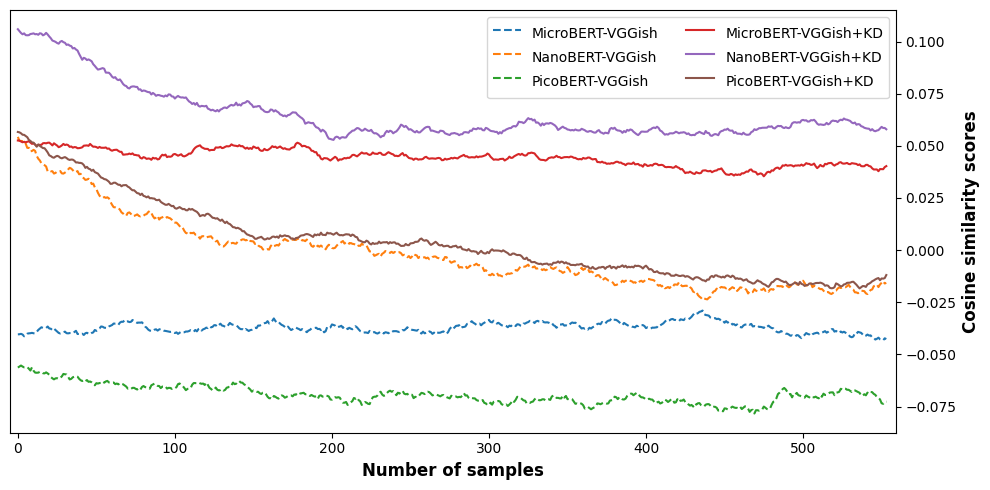

In [34]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()


ax.set_xlim([-5, len(microbert_kd) + 5])
# ax.set_ylim([-0.09, 0.095])

if data_type == 'test':
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")

weight = 0.992
microbert_kd_sm = smooth(microbert_kd, weight)
microbert_sm = smooth(microbert, weight)

minibert_kd_sm = smooth(minibert_kd, weight)
minibert_sm = smooth(minibert, weight)

nanobert_kd_sm = smooth(nanobert_kd, weight)
nanobert_sm = smooth(nanobert, weight)

picobert_kd_sm = smooth(picobert_kd, weight)
picobert_sm = smooth(picobert, weight)

microbert_kd_mse_sm = smooth(microbert_kd_mse, weight)

minibert_kd_mse_sm = smooth(minibert_kd_mse, weight)

nanobert_kd_mse_sm = smooth(nanobert_kd_mse, weight)

picobert_kd_mse_sm = smooth(picobert_kd_mse, weight)


# plt.plot(minibert_kd_sm, label='MiniBERT-VGGish+KD')
# plt.plot(microbert_kd_sm, label='MicroBERT-VGGish+KD')
# plt.plot(nanobert_kd_sm, label='NanoBERT-VGGish+KD')
# plt.plot(picobert_kd_sm, label='PicoBERT-VGGish+KD')


# plt.plot(minibert_sm, label='MiniBERT-VGGish', ls = '--')
plt.plot(microbert_sm, label='MicroBERT-VGGish', ls = '--')  
plt.plot(nanobert_sm, label='NanoBERT-VGGish', ls = '--')
plt.plot(picobert_sm, label='PicoBERT-VGGish', ls = '--')


# plt.plot(minibert_kd_mse_sm, label='MiniBERT-VGGish+KD')
plt.plot(microbert_kd_mse_sm, label='MicroBERT-VGGish+KD')
plt.plot(nanobert_kd_mse_sm, label='NanoBERT-VGGish+KD')
plt.plot(picobert_kd_mse_sm, label='PicoBERT-VGGish+KD')

# plt.legend()
plt.legend(ncol=2,  handleheight=2.2, labelspacing=0.02)

plt.ylabel("Cosine similarity scores", fontsize=12, fontweight="bold")
plt.xlabel("Number of samples", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.savefig(f"cosine_similarity_compare_{data_type}.png", dpi=300, bbox_inches='tight')
plt.show()
